In [68]:
#import libraries
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy import linalg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler


import confusion_matrix2

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "cmr"
})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
# Load testing data
train_data = pd.read_csv("../TrainingData/neodata/fault_all_nonoise_67.csv")
test_data = pd.read_csv("../TestData/neodata/fault_all_nonoise_67.csv")
val_data = pd.read_csv("../ValidationData/neodata/fault_all_nonoise_67.csv")

#Swap ambient and set point temprature for nonfaulty data.
#Code is ugly but works ;)
train_data1 = train_data.copy()
train_data_faulty = train_data1[train_data1['target']!=0]
train_data1_nonfaulty = train_data1[train_data1['target']==0]
train_data1_nonfaulty = train_data1_nonfaulty[['Pdis','T0','Tc','Tdis','Tret','Tsuc','Tsh','Tsup','CondFan','Tset','Tamb','target']]
train_data1_nonfaulty = train_data1_nonfaulty.rename(columns = {'Tset':'Tamb','Tamb':'Tset'})
train_data = pd.concat([train_data1_nonfaulty, train_data_faulty])

val_data1 = val_data.copy()
val_data_faulty = val_data1[val_data1['target']!=0]
val_data1_nonfaulty = val_data1[val_data1['target']==0]
val_data1_nonfaulty = val_data1_nonfaulty[['Pdis','T0','Tc','Tdis','Tret','Tsuc','Tsh','Tsup','CondFan','Tset','Tamb','target']]
val_data1_nonfaulty = val_data1_nonfaulty.rename(columns = {'Tset':'Tamb','Tamb':'Tset'})
val_data = pd.concat([val_data1_nonfaulty, val_data_faulty])

test_data1 = test_data.copy()
test_data_faulty = test_data1[test_data1['target']!=0]
test_data1_nonfaulty = test_data1[test_data1['target']==0]
test_data1_nonfaulty = test_data1_nonfaulty[['Pdis','T0','Tc','Tdis','Tret','Tsuc','Tsh','Tsup','CondFan','Tset','Tamb','target']]
test_data1_nonfaulty = test_data1_nonfaulty.rename(columns = {'Tset':'Tamb','Tamb':'Tset'})
test_data = pd.concat([test_data1_nonfaulty, test_data_faulty])

In [70]:
# Scaling to zero mean and unit variance
Standard = StandardScaler()         # sklearn.preprocessing 

X_trn = Standard.fit_transform(train_data.drop(['target'],axis =1 ))
X_val = Standard.transform(val_data.drop(['target'],axis=1))
X_tst = Standard.transform(test_data.drop(['target'],axis =1 ))

Y_trn = np.ravel(train_data['target'])
Y_val = np.ravel(val_data['target'])
Y_tst = np.ravel(test_data['target'])



# SVM

(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Test data : Accuracy 95.333%'}, xlabel='Predicted class', ylabel='True class'>)

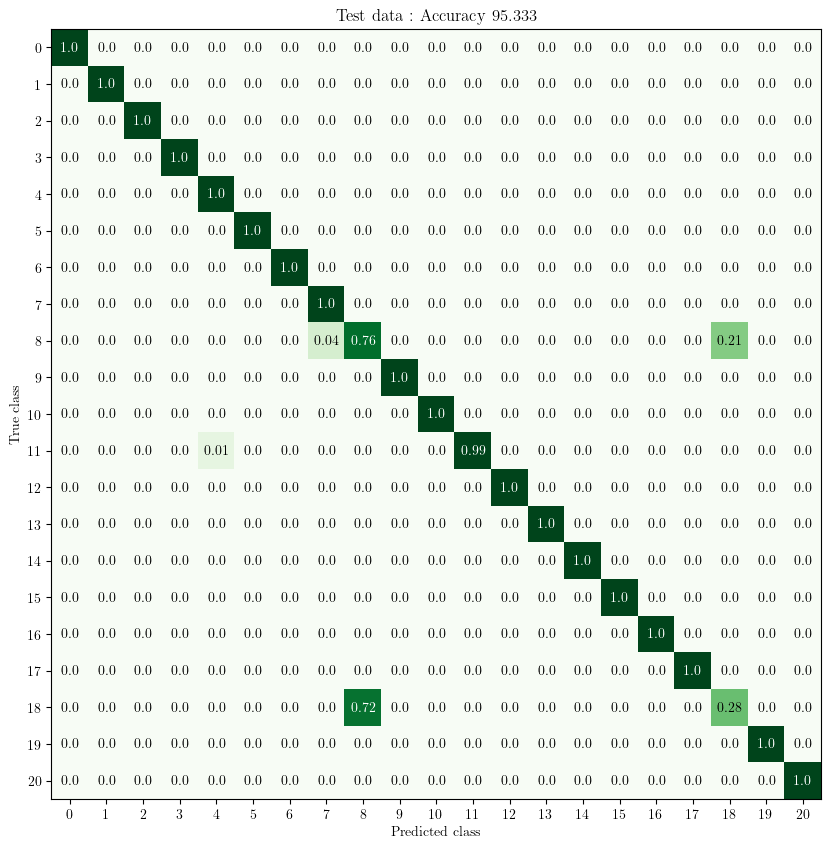

In [77]:
from sklearn import svm

#Train SVM
clf = svm.SVC( kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)
clf.fit(X_trn,Y_trn)

# Test on test data
Y_val_predict = clf.predict(X_val)

#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_val,Y_val_predict, figsize = (10,10), save_fig_name = 'SVM_test_swap.pdf', title = 'Test data',eval_labels = False)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Test data : Accuracy 85.714%'}, xlabel='Predicted class', ylabel='True class'>)

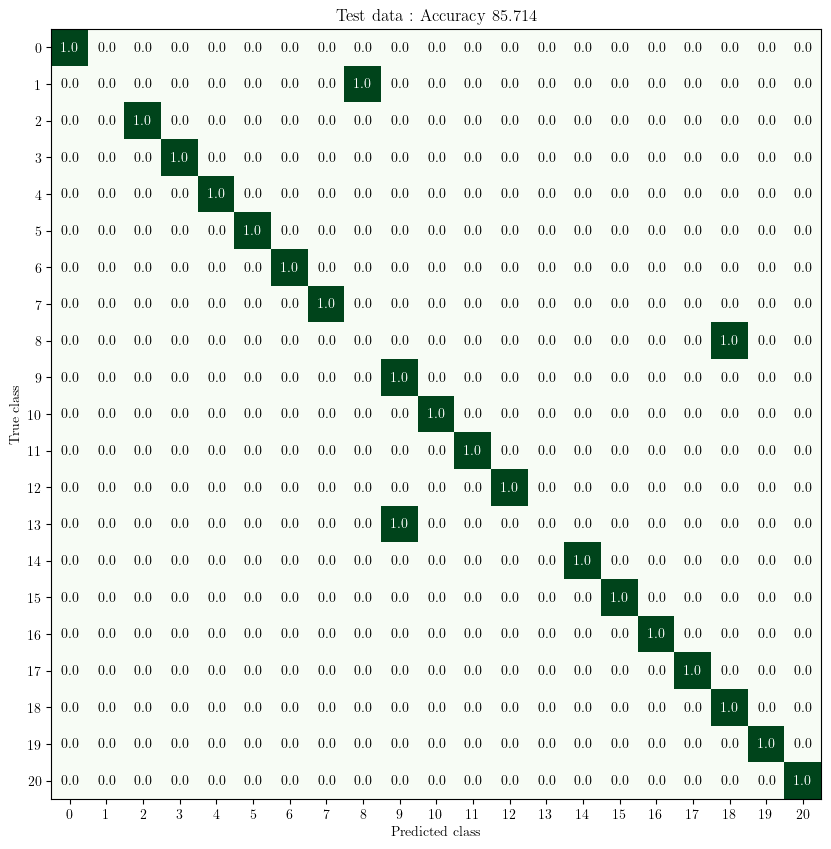

In [85]:

# Test on test data
Y_tst_predict = clf.predict(X_tst)

#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_tst,Y_tst_predict, figsize = (10,10), save_fig_name = 'SVM_test_swap.pdf', title = 'Test data',eval_labels = False)

## LDA-SVM 

Preserving 98.7% of variance


c:\Users\laula\OneDrive\Documents\GitHub\p7-ml-refrigeration-fault-detection\Python\lda.py:69: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self.target_id in data: target_id = self.target_id


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Test data : Accuracy 84.119%'}, xlabel='Predicted class', ylabel='True class'>)

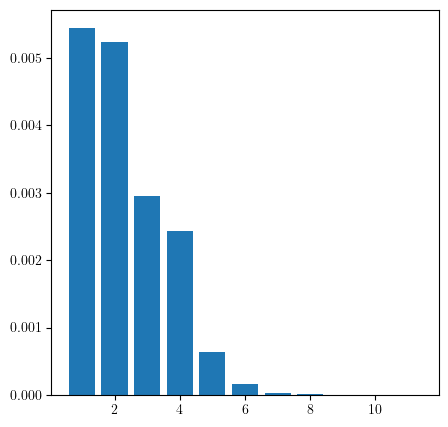

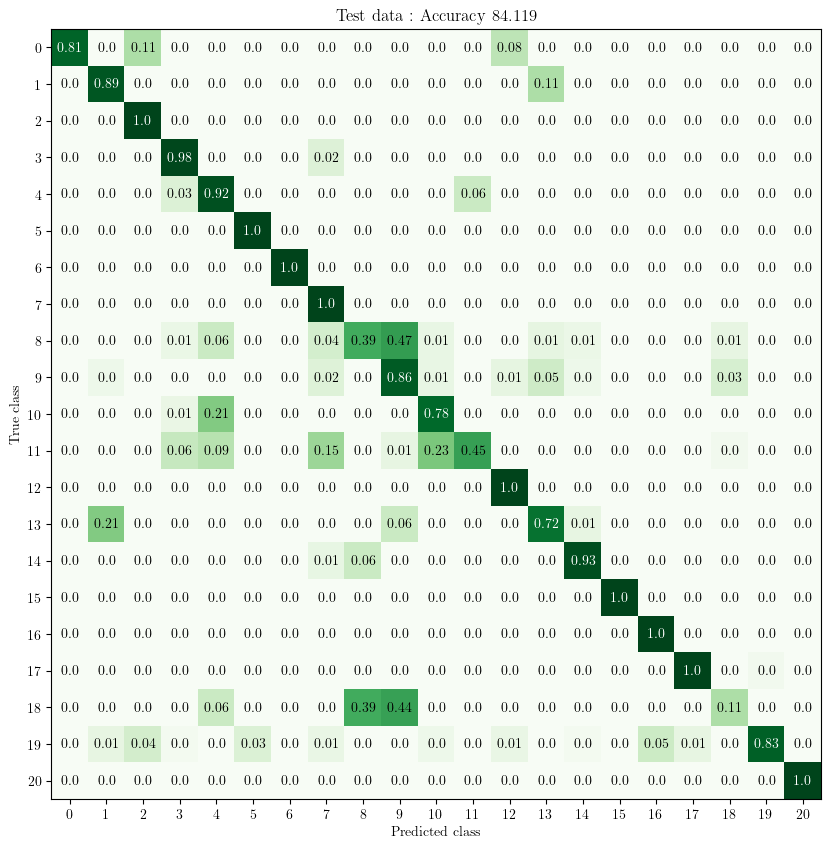

In [83]:
from lda import LDA_reducer as reducer
LDA = reducer(train_data,5,'target')

LDA_trn =LDA.transform(X_trn)
LDA_val =LDA.transform(X_val)
LDA_tst =LDA.transform(X_tst)

clf_SVM_LDA = svm.SVC(kernel="rbf", decision_function_shape="ovo", C=1000, gamma=0.01)

clf_SVM_LDA.fit(LDA_trn,Y_trn)

# Test on test data
Y_val_predict = clf_SVM_LDA.predict(LDA_val)

#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_val,Y_val_predict, figsize = (10,10), save_fig_name = 'SVM-LDA_test_swap.pdf', title = 'Test data',eval_labels = False)


(<Figure size 1000x1000 with 1 Axes>,
 <AxesSubplot:title={'center':'Test data : Accuracy 84.577%'}, xlabel='Predicted class', ylabel='True class'>)

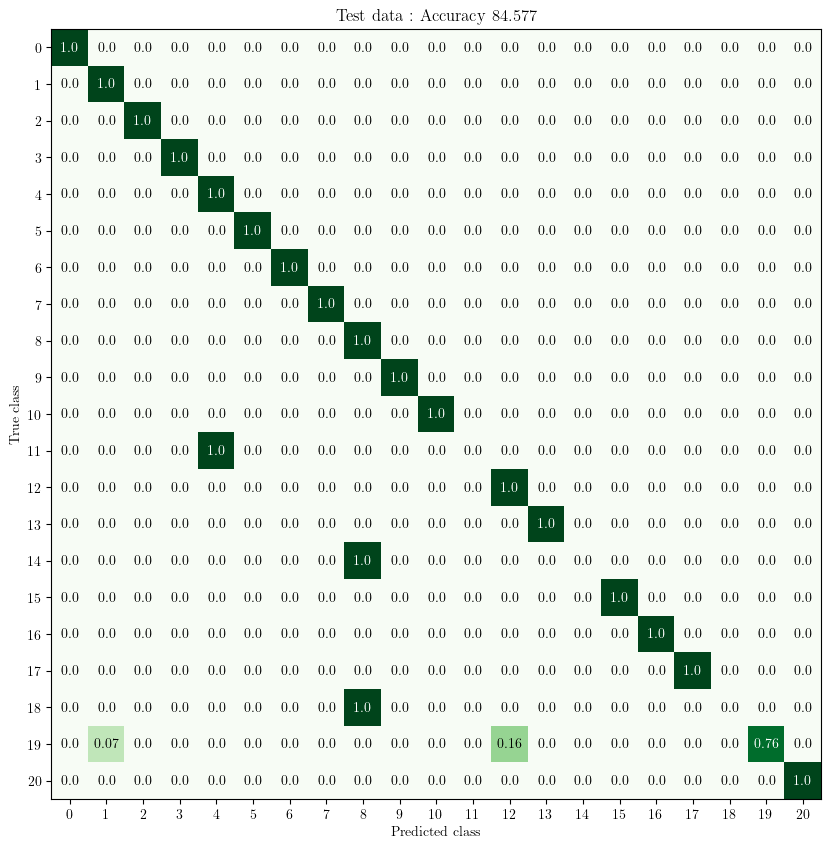

In [84]:
Y_tst_predict = clf_SVM_LDA.predict(LDA_tst)

#Generate confusion matrix pdf
confusion_matrix2.confusion_matrix(Y_tst,Y_tst_predict, figsize = (10,10), save_fig_name = 'SVM-LDA_test_swap.pdf', title = 'Test data',eval_labels = False)